In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
from matplotlib import font_manager, rc
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# Pandas
데이터 프레임
파이썬에서 데이터를 편리하게 다루기 위해 테이블 구조로 데이터를 처리하는 경우가 많음
파이썬의 pandas 패키지를 사용하여, 제공하는 데이터 프레임을 이용

### 기본 기능
데이터프레임에는 숫자, 문자열, 불리언 등 임의의 타입의 데이터를 담을 수 있음
+ 예제 딕셔너리 타입의 데이터로부터 데이터프레임을 만드는 예를 보임

In [2]:
dic = {'city':['서울', '부산', '대전', '대구', '광주'],
      'year':[2017,2017,2018,2018,2018],
      'temp':[18, 20, 19, 21, 20]}
data = pd.DataFrame(dic)
print(data)

  city  year  temp
0   서울  2017    18
1   부산  2017    20
2   대전  2018    19
3   대구  2018    21
4   광주  2018    20


데이터프레임을 만들면 인덱싱 번호가 자동으로 부여되며 번호는 0부터 시작

컬럼의 배치는 알파벳순으로 정렬, 컬럼의 순서를  바꾸려면 컬럼명을 원하는 순서로 된 리스트로 만들어서 인자로 주면 된다.

In [3]:
data[['year','city','temp']]

,year,city,temp
0,2017,서울,18
1,2017,부산,20
2,2018,대전,19
3,2018,대구,21
4,2018,광주,20


## 인덱스
인덱스를 임의의 이름으로 지정할 수 있음

In [4]:
data.index = ['a', 'b', 'c', 'd', 'e']
print(data)

  city  year  temp
a   서울  2017    18
b   부산  2017    20
c   대전  2018    19
d   대구  2018    21
e   광주  2018    20


컬럼 이름을 변경

In [5]:
data.columns = ['도시', '연도', '날씨']

특정한 **컬럼의 내용**만 얻기
1. 컬럼의 이름을 [] 내의 인자로 지정하는 방법
2. 컬림 이름을 속성 값으로 취급하여 "." 연산을 이용하는 방법

+ 컬럼명으로 접근(data['연도'])
+ 속성값으로 접근(data.연도)

데이터프레임에서 특정 행을 얻는 방법에는 두 가지가 있음
인덱스를 사용하는 방법 loc()을 사용하는 방법

In [6]:
data.loc['b']

도시      부산
연도    2017
날씨      20
Name: b, dtype: object

인덱스가 아니라 행의 위치를 지정하는 방법
이때는 iloc()을 사용
":"를 사용하여 행의 범위를 지정 가능

In [7]:
data.iloc[1:3]

,도시,연도,날씨
b,부산,2017,20
c,대전,2018,19


인덱스를 임의의 컬럼을 재배정할 수 있음

In [8]:
data.set_index(['도시'], inplace=True)
print(data)

      연도  날씨
도시          
서울  2017  18
부산  2017  20
대전  2018  19
대구  2018  21
광주  2018  20


## 행 출력

In [9]:
data.loc['서울'];data

,연도,날씨
도시,,
서울,2017,18
부산,2017,20
대전,2018,19
대구,2018,21
광주,2018,20


In [10]:
data.iloc[1:2]

,연도,날씨
도시,,
부산,2017,20


## 컬럼 추가
새로운 컬럼을 추가하려면 현재 없는 컬럼명을 인자로 주면 새로운 컬럼이 자동으로 생성된다.

In [11]:
cars = [50,40,20,30,10]
data['car'] = cars;data

,연도,날씨,car
도시,,,
서울,2017,18,50
부산,2017,20,40
대전,2018,19,20
대구,2018,21,30
광주,2018,20,10


In [12]:
data['high'] =data.car>=30; data

,연도,날씨,car,high
도시,,,,
서울,2017,18,50,True
부산,2017,20,40,True
대전,2018,19,20,False
대구,2018,21,30,True
광주,2018,20,10,False


In [13]:
data['high'] = data.날씨>=20
print(data)

      연도  날씨  car   high
도시                      
서울  2017  18   50  False
부산  2017  20   40   True
대전  2018  19   20  False
대구  2018  21   30   True
광주  2018  20   10   True


In [14]:
# data.columns = [ 'year', 'temp', 'car', 'high']

In [15]:
print(data)

      연도  날씨  car   high
도시                      
서울  2017  18   50  False
부산  2017  20   40   True
대전  2018  19   20  False
대구  2018  21   30   True
광주  2018  20   10   True


index 되돌리기

특정 컬럼을 삭제하려면 drop을 사용
drop 함수를 호출 할 때 인자 값으로 0이나 1을 줄 수 있는데 
+ 1의 의미는 컬럼을 기준으로 삭제를 하라는 뜻

In [16]:
data.drop(['car', 'high'], 1)

,연도,날씨
도시,,
서울,2017,18
부산,2017,20
대전,2018,19
대구,2018,21
광주,2018,20


In [17]:
data.reset_index()
#set_index의 역할 반대
#reset_index()
# https://kongdols-room.tistory.com/123

,도시,연도,날씨,car,high
0,서울,2017,18,50,False
1,부산,2017,20,40,True
2,대전,2018,19,20,False
3,대구,2018,21,30,True
4,광주,2018,20,10,True


## apply
함수를 편리하게 데이터에 일괄 적용하는 방법으로 apply가 있음
아래는 최대값 - 최소값을 계산하는 함수를 정의하고 이를 데이터에 적용하는 예

In [18]:
f = lambda x: x.max() - x.min()
df = pd.DataFrame(np.arange(12).reshape(4,3), columns=['A','B','C'], index = ['a','b','c','d'])
print(df)

   A   B   C
a  0   1   2
b  3   4   5
c  6   7   8
d  9  10  11


In [19]:
df.apply(f)

A    9
B    9
C    9
dtype: int64

행에 대해서 함수를 적용하려면 (좌에서 우로 수행) 인자 axis = 1로 지정

In [20]:
df.apply(f,axis=1)

a    2
b    2
c    2
d    2
dtype: int64

In [21]:
df.apply(f,axis=0)

A    9
B    9
C    9
dtype: int64

## Series
판다스는 시리즈 객체를 제공하는데 이를 컬럼이 하나뿐인 데이터프레임이다.
즉, 특수한 구조의 데이터프레임이라고 할 수 있음

In [22]:
region = pd.Series(['서울','부산','대전','대구','광주'], index = ['1','2','3','4','5'])
print(region)

1    서울
2    부산
3    대전
4    대구
5    광주
dtype: object


## 그래프
시각화의 기본사항
``` python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#맥 사용자만 해당 retina 해상도 지원
```

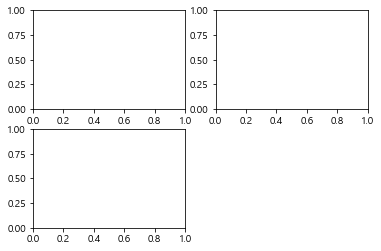

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

히스토그램, 산점도, 랜덤넘버 그래프를 그리기

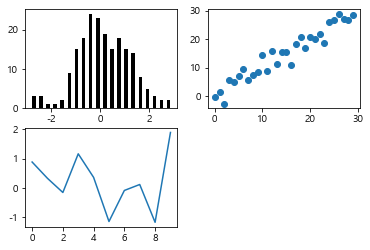

In [24]:
ax1.hist(np.random.randn(200), bins=20, color='k',rwidth=0.5)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
ax3.plot(np.arange(10), np.random.randn(10))
fig

같은 코드를 두 번 실행하면 그림을 계속 겹쳐서 그리는 것을 알 수 있다.

2*2 = 4 개의 그림을 그리는 예임

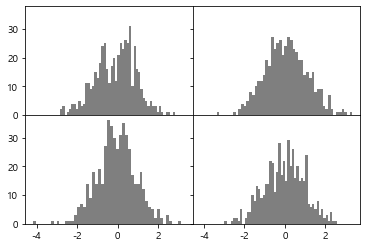

In [25]:
fig, axes = plt.subplots(2,2, sharex = True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

1000개의 랜덤넘버 (정규분포)의 누적 값을 그리는 예이다.

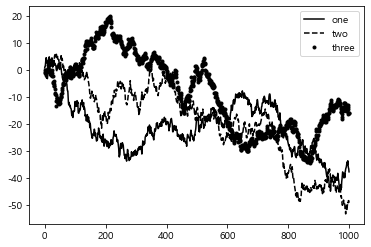

In [26]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

막대그래프를 서브그래프를 이용하여 그리는 예

<AxesSubplot:>

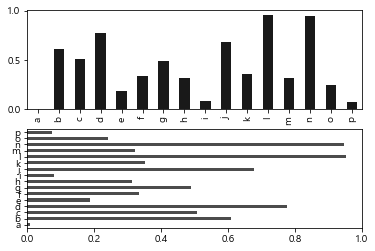

In [27]:
from pandas import Series
fig, axes = plt.subplots(2,1)
data = Series(np.random.rand(16),
             index = list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.9)
data.plot(kind='barh', ax=axes[1], color='k',alpha=0.7)

일반 도형을 그리는 함수도 제공

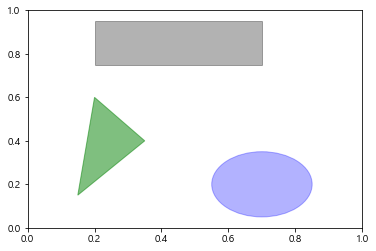

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.5, 0.2, color='k', alpha=0.3)
#(0.2, 0.75) 사각형의 시작점 0.5 가로길이 0.2 세로길이를 뜻함
circ = plt.Circle((0.7, 0.2), 0.15,color='b',alpha=0.3)
# (0.7, 0.2) 원의 중심 / 0.15은 원의 반지름
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

데이터프레임으로부터 막대그래프를 그리는 예

Genus         A         B         C         D
one    0.711533  0.526787  0.816823  0.471321
two    0.478705  0.958485  0.083416  0.160012
three  0.005006  0.341882  0.641654  0.675062
four   0.184905  0.414716  0.221012  0.043580
five   0.283400  0.650596  0.477833  0.117349
six    0.713586  0.736913  0.113808  0.202562


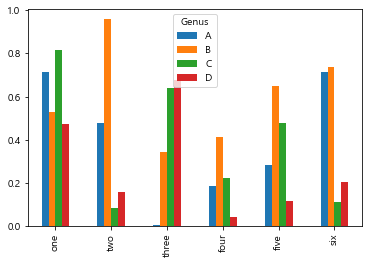

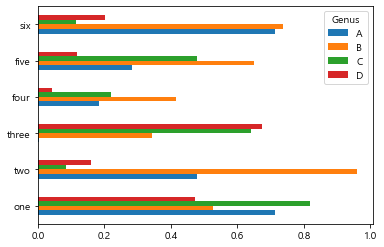

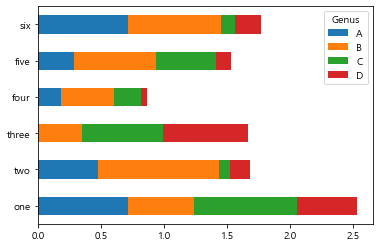

In [29]:
from pandas import DataFrame
df = DataFrame(np.random.rand(6,4),index = ['one', 'two', 'three', 'four', 'five','six'],
              columns = pd.Index(['A','B','C','D'], name = 'Genus'))
df.plot(kind='bar')
df.plot(kind='barh')
df.plot(kind='barh', stacked=True)
print(df)

### 확률 밀도함수 그리기

<AxesSubplot:ylabel='Density'>

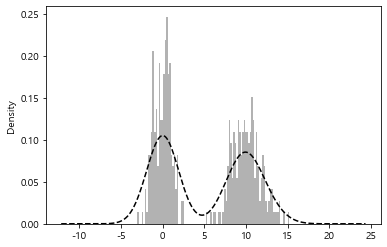

In [30]:
comp1 = np.random.normal(0,1,size=200)# N 0,1
comp2 = np.random.normal(10,2, size=200)# N 10, 4
values = Series(np.concatenate([comp1,comp2]))
#concat(1,2) -1번째 문자열에 두번째 문자열을 합치는 함수와 동일
values.hist(bins=100,alpha=0.3,color='k', density=True)
values.plot(kind='kde', style='k--')

## 데이터프레임 연습

### 정렬
Pandas에는 Series와 DataFrame이라는 두 가지 객체가 있으며 먼저 인덱스를 기준으로 정렬하는 방법
Series의 기본 구조는 index와 그 index에 맵핑이 되는 values 값으로 구성

In [31]:
obj = Series(range(4), index=['d','a','b','c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

이를 인덱스 기준으로 정렬

In [32]:
obj.sort_index()
print(obj)

d    0
a    1
b    2
c    3
dtype: int64


임의의 데이터프레임을 만들면서 인덱스와 컬럼명을 지정한 것
```python
frame = DataFrame(np.arange(8).reshape((2,4)),index=['three','one'], columns=['d','a','b','c'])
```

In [33]:

frame = DataFrame(np.arange(8).reshape((2,4)),index=['three','one'], columns=['d','a','b','c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [34]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [35]:
frame.sort_index(axis=1)# 열 기준 정렬 axis = 1

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [36]:
frame.sort_index(axis=1, ascending=False)# 내림차순 정렬 ascending=False

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


새로운 데이터 프레임 생성
```python
frame = DataFrame({'b':[4,7,3.2], 'a':[4,9,2,5], 'c' : [5,3,7,9]})
frame
```

In [37]:

frame = DataFrame({'b':[4,7,3,2], 'a':[4,9,2,5], 'c':[5,3,7,9]})
frame


,b,a,c
0,4,4,5
1,7,9,3
2,3,2,7
3,2,5,9


In [38]:
frame.sort_values(by='b')#컬럼 'b' 기준으로 정렬

,b,a,c
3,2,5,9
2,3,2,7
0,4,4,5
1,7,9,3


In [39]:
frame.sort_values(by='a')#컬럼 'a'기준으로 정렬

,b,a,c
2,3,2,7
0,4,4,5
3,2,5,9
1,7,9,3


### rank
순위를 정하고 순위값을 배정할 수 있으며 rank()를 사용

In [40]:
obj = Series([100,23,55,44,22,99,33])
obj.rank()

0    7.0
1    2.0
2    5.0
3    4.0
4    1.0
5    6.0
6    3.0
dtype: float64

In [41]:
obj.rank(ascending=False) # 내림차수능로 순위 매기기

0    1.0
1    6.0
2    3.0
3    4.0
4    7.0
5    2.0
6    5.0
dtype: float64

동점의 순위가 있으면 순위 값으로 중간 평균값을 준다

In [42]:
obj = Series([100,23,100,55,44,22,99,33])
obj.rank()

0    7.5
1    2.0
2    7.5
3    5.0
4    4.0
5    1.0
6    6.0
7    3.0
dtype: float64

In [43]:
obj.rank(method='first')# 동일한 값이 존재 할 경우 먼저 나타나는 것에게 높은 순위를 줄 수 있음


0    7.0
1    2.0
2    8.0
3    5.0
4    4.0
5    1.0
6    6.0
7    3.0
dtype: float64

새로운 프레임 생성

In [44]:
frame = DataFrame({'b':[4,7,3,2], 'a':[4,9,2,5], 'c':[5,3,7,9]})
frame

,b,a,c
0,4,4,5
1,7,9,3
2,3,2,7
3,2,5,9


In [46]:
frame.rank(axis=1) # 행 기준 rank화

,b,a,c
0,1.5,1.5,3.0
1,2.0,3.0,1.0
2,2.0,1.0,3.0
3,1.0,2.0,3.0


In [47]:
frame = DataFrame({'b':[4,7,3,2], 'a':[4,9,2,5], 'c':[5,3,7,np.nan]})
frame
#NaN이 있는 경우 빼고 계산함

,b,a,c
0,4,4,5.0
1,7,9,3.0
2,3,2,7.0
3,2,5,NaN


In [49]:
#합이나 평균은 기본적으로 열을 기준으로 구함
print(frame.sum())
print(frame.mean())

b    16.0
a    20.0
c    15.0
dtype: float64
b    4.0
a    5.0
c    5.0
dtype: float64


NaN이 있으면 이를 반영하도록 즉, 스킵하지 않게 하려면 다음과 같이 skipna=False로 지정

In [50]:
frame.sum(skipna=False)

b    16.0
a    20.0
c     NaN
dtype: float64

최대치가 있는 위치를 얻으려면 idxmax()를 사용한다

In [51]:
frame.idxmax()

b    1
a    1
c    2
dtype: int64

최소치가 있는 위치를 얻으려면 idxmin()를 사용한다.

In [53]:
frame.idxmin()

b    3
a    2
c    1
dtype: int64

중복되지 않는 항목들을 찾으려면 unique()를 사용한다.

In [55]:
obj = Series(['c','a','d','a','a','b','b','c','c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [57]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

### value_count
항목의 빈도수를 알려면 value_count()를 사용한다.
기본적으로 빈도수가 높은 순으로 정렬된다.

In [58]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

나타난 순서대로보려면 sort = False 설정

In [59]:
obj.value_counts(sort=False)

c    3
d    1
b    2
a    3
dtype: int64

특정한 항목이 들어있는지 알려면 isin()을 사용
결과는 불리언으로 얻음

In [60]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [61]:
obj[mask] # 데이터에서 mask값이 true인 값만을 출력하려면 이를 인덱스로 사용

0    c
5    b
6    b
7    c
8    c
dtype: object

위의 동작을 간편하게 아래와 같이 사용하면 편리하다

In [64]:
obj[obj.isin(['b','c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

임의의 데이터프레임을 만듦

In [68]:
frame = DataFrame({'X':['c','a','d','a','a','b','b','c','c'],
                  'Y':['f','g','d','g','h','e','d','h','f'],
                  'Z':['a','e','d','g','d','e','q','b','c']})
frame

,X,Y,Z
0,c,f,a
1,a,g,e
2,d,d,d
3,a,g,g
4,a,h,d
5,b,e,e
6,b,d,q
7,c,h,b
8,c,f,c


In [69]:
result = frame.apply(pd.value_counts)
result

,X,Y,Z
a,3.0,NaN,1.0
b,2.0,NaN,1.0
c,3.0,NaN,1.0
d,1.0,2.0,2.0
e,NaN,1.0,2.0
f,NaN,2.0,NaN
g,NaN,2.0,1.0
h,NaN,2.0,NaN
q,NaN,NaN,1.0


In [70]:
result = frame.apply(pd.value_counts).fillna(0)
result

,X,Y,Z
a,3.0,0.0,1.0
b,2.0,0.0,1.0
c,3.0,0.0,1.0
d,1.0,2.0,2.0
e,0.0,1.0,2.0
f,0.0,2.0,0.0
g,0.0,2.0,1.0
h,0.0,2.0,0.0
q,0.0,0.0,1.0


### 결측치 처리
결측치 처리시에 한 항목이라도 NA가 있으면 해당 행ㅇ을 삭제하려면 dropna()를 사용한다.

In [73]:
data = DataFrame([[np.nan,6.5,3.], [np.nan, np.nan, np.nan],[np.nan,np.nan,np.nan],[np.nan,6.5,3.]])
data

,0,1,2
0,NaN,6.5,3.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [74]:
cleaned = data.dropna();cleaned

,0,1,2


행의 모든 항목이 NA일 때만 해당 행을 삭제하려면 아래와 같이 how옵션을 사용함

In [75]:
data.dropna(how='all')

,0,1,2
0,NaN,6.5,3.0
3,NaN,6.5,3.0


데이터의 삭제 drop()은 기본적으로 행 단위로 이루어진다
열에 대한 삭제를 하려면 axis=1을 지정
모든 항목이 NA인 경우만 삭제하려면 how 옵션을 지정

In [76]:
clean2 = data.dropna(axis=1);clean2

""
0
1
2
3


In [77]:
clean2 = data.dropna(axis=1, how='all');clean2

,1,2
0,6.5,3.0
1,NaN,NaN
2,NaN,NaN
3,6.5,3.0


임의의 데이터 프레임 생성
NA가 특정 개수, 예를 들어 2개 이상인 경우만 삭제하려면 thresh 옵션을 지정한다.

In [78]:
df = DataFrame(np.random.randn(7,3))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df.iloc[0,0] = np.nan
df

,0,1,2
0,NaN,NaN,NaN
1,0.683890,NaN,NaN
2,-0.400686,NaN,-0.569681
3,1.618591,NaN,1.624406
4,1.310323,1.472828,-0.154507
5,0.188834,-1.048983,2.055953
6,0.499712,0.118992,-0.704371


In [79]:
df.dropna(thresh=2)

,0,1,2
2,-0.400686,NaN,-0.569681
3,1.618591,NaN,1.624406
4,1.310323,1.472828,-0.154507
5,0.188834,-1.048983,2.055953
6,0.499712,0.118992,-0.704371


fillna()를 수행할 때 모두 같은 값ㅇ으로 채우지 않고 컬럼 별로 다른 값을 채울 수 있는데 아래와 같이 딕셔너리 형태로 값을 지정하면 된다.

In [80]:
df.fillna({1:0.5, 2:-1})

,0,1,2
0,NaN,0.500000,-1.000000
1,0.683890,0.500000,-1.000000
2,-0.400686,0.500000,-0.569681
3,1.618591,0.500000,1.624406
4,1.310323,1.472828,-0.154507
5,0.188834,-1.048983,2.055953
6,0.499712,0.118992,-0.704371


데이터프레임에 대한 조작을 수행하면 view만 변경되며 원래의 값은 변경되지 않는다. 원래의 값을 변경하려면 새로운 변수에 결과를 저장하여 사용하면 된다.(또는 inplaces=True)사용

In [81]:
df2 = df.fillna({1:0.5, 2:-1})
df2

,0,1,2
0,NaN,0.500000,-1.000000
1,0.683890,0.500000,-1.000000
2,-0.400686,0.500000,-0.569681
3,1.618591,0.500000,1.624406
4,1.310323,1.472828,-0.154507
5,0.188834,-1.048983,2.055953
6,0.499712,0.118992,-0.704371
